In [1]:
# Importing useful packages

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Main objectives: 

# 1. Demonstrate an understanding of Nyquist sampling and aliasing.
# 2. Characterize the bandpass filter of the SDR.
# 3. Use and accurately describe power and voltage spectra
# 4. Investigate spectral leackage and frequency resolution. 
# 5. Analyze the properties of noise and the radiometer equation. 
# 6. Demonstrate the operation of DSB and SSB mizers and explain their importance. 
# 7. Accurately present quantitative results in the context of expectations, theory, tests, and diagnostics that 
#    demonstrate the correctness of the analysis. 
# 8. Build an installable Python package, with revision constrol and unit tests, that supports your report. 
#    Provide the link in your report. 

In [4]:
# Working question: 
# How can aliasing be utilized to filter noise and pass through a clean signal where we can understand 
# the information being conveyed?

# Main idea from this is take in a noisy signal, alias it down, and then see how less data might give us a clearer signal.

In [5]:
# Steps: 

# Load in data. Show our observed vs. expected (theory vs. real) 
# Create a few graphs that show the aliasing -- graph that shows the nyquist zones shaded in and the FT peaks 
# in those zones

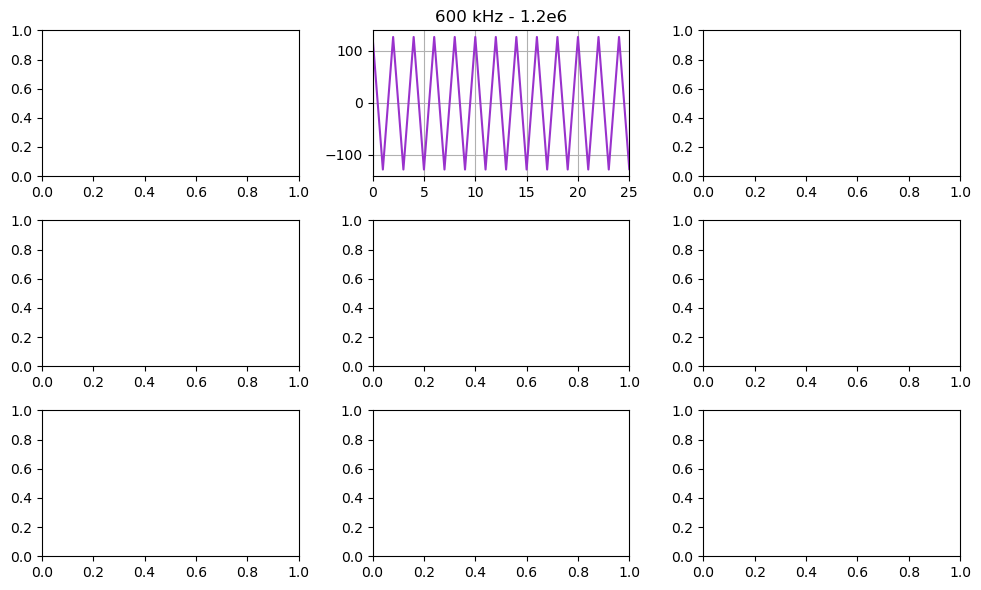

In [82]:
# 600 kHz data, amplitude = 100 mV

#sample rate = 1.0e6
below_lim_600khz = np.load("below_lim_600khz.npz")


#sample rate = 1.2e6
Nny_lim_600khz = np.load("ny_lim_600khz.npz")
Nny_lim_600khz1 = Nny_lim_600khz["arr_0"]

#sample rate = 1.4e6


# Plotting sr = 1.0e6 against expected value 

# plt.figure(figsize = (10, 4))
# plt.plot(Nny_lim_600khz1[4], 'coral', marker = "o")
# plt.xlim(0, 100) 


# 700 kHz data, amplitude = 100 mV

#sample rate = 1.0e6


#sample rate = 1.2e6
Nny_lim_600khz = np.load("ny_lim_700khz.npz")
Nny_lim_600khz1 = Nny_lim_600khz["arr_0"]

#sample rate = 1.4e6


# Plotting sr = 1.0e6 against expected value 

# plt.figure(figsize = (10, 4))
# plt.plot(Nny_lim_600khz1[4], 'green', marker = "o")
# plt.xlim(0, 100)


#Labels
# plt.xlabel("Amplitude")
# plt.ylabel("Counts")
# plt.title("700 kHz Signal Frequency with a Sample Rate of 1.2e6 - Nyquist Limit")
# plt.show()



# 800 kHz data, amplitude = 100 mV

#sample rate = 1.0e6


#sample rate = 1.2e6
Nny_lim_600khz = np.load("ny_lim_800khz.npz")
Nny_lim_600khz1 = Nny_lim_600khz["arr_0"]

#sample rate = 1.4e6


# Plotting sr = 1.0e6 against expected value 

# plt.figure(figsize = (10, 4))
# plt.plot(Nny_lim_600khz1[4], 'green', marker = "o")
# plt.xlim(0, 100)

# #Labels
# plt.xlabel("Counts")
# plt.ylabel("Amplitude")
# plt.title("700 kHz Signal Frequency with a Sample Rate of 1.2e6 - Nyquist Limit")
# plt.show()

# Subplot grid to compare 
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(10, 6))

# row 1: 600 khz plots
# axes[0, 0].plot(, color='darkorchid')
# axes[0, 0].set_title("600 kHz - 1.0e6")
# axes[0, 0].grid(True)

axes[0, 1].plot(Nny_lim_600khz1[5], color='darkorchid')
axes[0, 1].set_title("600 kHz - 1.2e6")
axes[0, 1].set_xlim(0, 25)
axes[0, 1].grid(True)




plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x) * np.cos(x)
y4 = np.exp(-x / 3) * np.sin(2 * x)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Plot in each subplot
axes[0, 0].plot(x, y1, color='blue')
axes[0, 0].set_title("Sine Wave")
axes[0, 0].grid(True)

axes[0, 1].plot(x, y2, color='red')
axes[0, 1].set_title("Cosine Wave")
axes[0, 1].grid(True)

axes[1, 0].plot(x, y3, color='green')
axes[1, 0].set_title("Sine × Cosine")
axes[1, 0].grid(True)

axes[1, 1].plot(x, y4, color='purple')
axes[1, 1].set_title("Damped Sine Wave")
axes[1, 1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


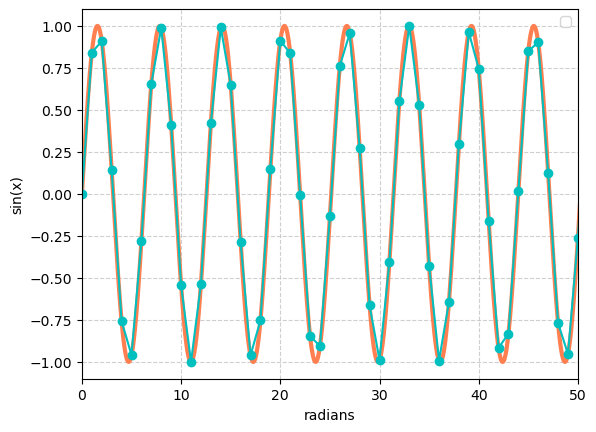

In [59]:
# Figuring out how to plot sin waves well so that I can compare the expected sin wave to the observed sin wave

# Jagged Sin Wave
x = np.arange(0, 101, dtype = int)
y = np.sin(x)

# Smooth Sine Wave
x_smooth = np.linspace(0, 8 * 2 * np.pi , 1000)
y_smooth = np.sin(x_smooth)

# Plotting 
plt.figure()
plt.plot(x_smooth, y_smooth, 'coral', linewidth = 3)
plt.plot(x, y, 'c', marker = 'o')
plt.xlim(0, 50)

# Labels
plt.xlabel('radians')
plt.ylabel('sin(x)')

# Grid & Legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()


plt.show()


In [ ]:

import ziptoplot as ztp
from ziptoplot import unzip
from ziptoplot import plot

data1 = ztp.unzip(ny_lim_600khz)

ztp.plot()


In [76]:
# For analyzing the noise, use numpy.histogram to plot the data 
# Overplot a theoretical Guassian with width equal to the rms voltage 